# <font style="color:blue">Project 1 - Part 1: Data Understanding & Pipeline Check</font>

Here, we will slightly modify the steps we had used to train Neural Networks:

- Step 1 - Understand your problem
- Step 2A - Get the data
- Step 2B - Explore & Understand your data
- Step 2C - Create a sample data from the dataset
- Step 3 - Data Preparation
- Step 4 - Train a simple model on sample data, and check the pipeline before training the full network
- Step 5 - Train on full Data
- Step 6 - Improve your model

In this notebook we will detail the steps 1 to 4, and do some coding along the way! You will implement Steps 5 & 6 in the next notebook.

This notebook contains 30 points. <font style="color:red">The sections in red are the ones that carry marks.</font>


# <font style="color:blue">Step 1: Understand Your Problem </font><a name="step1"></a>

As you already know, Image Classification helps classify an image based on its visual content. So, the model is supposed to look at the given image and predict which object is present in it. Obviously, the number of objects which it can predict depends on how many you trained it on.

In our problem, we want to classify an input image between **3 animals** - **_cat, dog and panda_**.

### <font style="color:green">What Do We Need and How to Achieve It? </font>

1. You need correctly-labeled images of each animal.
2. Also, you need to train a network to understand the input image.


## <font style="color:blue">Step 2A: Get the Data </font>

Let’s use a dataset from kaggle. <a target="_blank" href="https://www.kaggle.com/t/288960a266a34e52a968037d0951bac3">Go to the Data Tab</a>.

We have already separated the dataset into training, validation and test splits for you.


In [8]:
import os
import matplotlib.pyplot as plt


# Text formatting
bold = "\033[1m"
end = "\033[0m"

plt.style.use('ggplot')
block_plot=False

%matplotlib inline

# <font style="color:blue">Step 2B: Explore the Data [5 Points]</font><a name="step2b"></a>


In [9]:
#root_dir = r"/kaggle/input/open-cv-py-torch-project-2-classification-round-2/dataset"
root_dir = r"/kaggle/input/dataset/dataset"

train_dir = os.path.join(root_dir, "Train")
valid_dir = os.path.join(root_dir, "Valid")

### <font style="color:green">Folder Structure </font>


In [10]:
def list_folders(startpath):
    for root, _, files in os.walk(startpath):
        level = root.replace(startpath, "").count(os.sep)
        indent = " " * 4 * (level)
        print(f"{indent}{os.path.basename(root):<8}")


list_folders(root_dir)

dataset 
    Valid   
        dog     
        panda   
        cat     
    Test    
    Train   
        dog     
        panda   
        cat     


### <font style="color:green">Import the Datasets Module</font>

Load the data utilizing the `datasets` module.

In [11]:
from torchvision import datasets

### <font style="color:green">Create a Dataset Object </font>


In [12]:
train_data = datasets.ImageFolder(train_dir)
validation_data = datasets.ImageFolder(valid_dir)

### <font style="color:green">List the Classes</font>

It simply prints the sub folders present under the training or validation folder.


In [13]:
print(train_data.classes)
print(validation_data.classes)

['cat', 'dog', 'panda']
['cat', 'dog', 'panda']


### <font style="color:green">Get the Class ID to Name Mapping</font>

In [14]:
print(train_data.class_to_idx)
print(validation_data.class_to_idx)

{'cat': 0, 'dog': 1, 'panda': 2}
{'cat': 0, 'dog': 1, 'panda': 2}


### <font style="color:red">Find the Number of Samples in Training and Validation Folders [2 Points]</font>


In [15]:
# Enter Code Here
# Get the number of samples
num_train_samples = len(train_data)
num_valid_samples = len(validation_data)

print(f"Number of training samples: {num_train_samples}")
print(f"Number of validation samples: {num_valid_samples}")

Number of training samples: 2100
Number of validation samples: 300


### <font style="color:red">Display Some Samples [3 Points]</font>

Display one sample from each class. We know that the train dataset contains

- cats from 0 to 699
- dogs from 700 to 1399
- pandas from 1400 to 2099

Take one sample from each class and display using matplotlib


In [17]:
# Enter Code Here
img, target = train_data[0] 
print("image size: {}, target: {}".format(img.size, target))
plt.title("Cat")
plt.imshow(img)
plt.show()

image size: (500, 374), target: 0


In [18]:
# Enter Code Here
img, target = train_data[700] 
print("image size: {}, target: {}".format(img.size, target))
plt.title("Dog")

plt.imshow(img)
plt.show()

image size: (382, 478), target: 1


In [19]:
# Enter Code Here

img, target = train_data[1401] 
print("image size: {}, target: {}".format(img.size, target))
plt.title("Panda")

plt.imshow(img)
plt.show()

image size: (500, 375), target: 2


**Note:** The images are all of different size.


# <font style="color:blue">Step 2C: Create Sample Data</font><a name="step2c"></a>

Take `5%` images from training and validation to create a small sample dataset, which will check our training pipeline.


In [20]:
import torch
import numpy as np

In [21]:
subset_size = 0.05
print(torch.cuda.is_available())

True


### <font style="color:green">Create a Subset From the Original Data</font>

Instead of copying the original data, use the `Subset` method in `torch` to create a subset of the data. And use this to train the model.

This is new. Let’ss see how it is done.

In [22]:
train_subset = torch.utils.data.Subset(train_data, np.arange(0, len(train_data), 1.0 / subset_size))

validation_subset = torch.utils.data.Subset(validation_data, np.arange(0, len(validation_data), 1.0 / subset_size))

In [23]:
train_subset_loader = torch.utils.data.DataLoader(train_subset, batch_size=8, num_workers=1, shuffle=False)

validation_subset_loader = torch.utils.data.DataLoader(validation_subset, batch_size=8, num_workers=1, shuffle=False)

In [24]:
print("Train Subset Size: {}".format(len(train_subset_loader.dataset)))
print("Validation Subset Size: {}".format(len(validation_subset_loader.dataset)))

Train Subset Size: 105
Validation Subset Size: 15


You can see that the subset data is only 5% of the original training and validation data.

We will create a separate function called `subset_data_loader` to create data loaders for subsets.


# <font style="color:blue">Step 3. Data Preparation [5 Points]</font> <a name="step3"></a>

Now that you have seen how the data is organized, configure the train and valid loaders to feed the training pipeline.


## <font style="color:blue">3.1. Import Libraries </font>


In [25]:
import time
from dataclasses import dataclass
from typing import List, Union, Tuple


from tqdm import tqdm

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch.utils.tensorboard import SummaryWriter

from torchvision import datasets, transforms

from torchmetrics import MeanMetric
from torchmetrics.classification import MulticlassAccuracy

## <font style="color:blue">3.2. Image Transforms</font>

We need to normalize the data. Some of the standard ways of doing it is to, subtract the mean, make all images equal in size or to rescale the range to `[0., 1.]` etc. Use the following functions to do this:


### <font style="color:green">3.2.1. Compulsary Preprocessing Transforms</font>


In [26]:
def image_preprocess_transforms(img_size):
    preprocess = transforms.Compose(
        [
            transforms.Resize(img_size),
            transforms.ToTensor(),
        ]
    )

    return preprocess

### <font style="color:green">3.2.2. Common Image Transforms</font>

Normalize using mean and std. You can add any other transforms here as per your dataset.


In [27]:
def image_common_transforms(img_size=(224, 224), mean=(0.4611, 0.4359, 0.3905), std=(0.2193, 0.2150, 0.2109)):
    preprocess = image_preprocess_transforms(img_size)

    common_transforms = transforms.Compose(
        [
            preprocess,
            transforms.Normalize(mean, std),
        ]
    )

    return common_transforms

### <font style="color:green">3.2.3. Mean and STD</font>

Function for Calculating Mean and Variance

In [28]:
def get_mean_std(data_root, img_size=(224, 224), num_workers=4):
    transform = image_preprocess_transforms(img_size=img_size)

    loader = data_loader(data_root, transform)

    batch_mean = torch.zeros(3)
    batch_mean_sqrd = torch.zeros(3)

    for batch_data, _ in loader:
        batch_mean += batch_data.mean(dim=(0, 2, 3))  # E[batch_i]
        batch_mean_sqrd += (batch_data**2).mean(dim=(0, 2, 3))  #  E[batch_i**2]

    # E[dataset] = E[E[batch_1], E[batch_2], ...]
    mean = batch_mean / len(loader)

    # var[X] = E[X**2] - E[X]**2

    # E[X**2] = E[E[batch_1**2], E[batch_2**2], ...]
    # E[X]**2 = E[E[batch_1], E[batch_2], ...] ** 2

    var = (batch_mean_sqrd / len(loader)) - (mean**2)

    std = var**0.5
    print("mean: {}, std: {}".format(mean, std))

    return mean, std

## <font style="color:blue">3.3. Data Loaders </font>


### <font style="color:green">3.3.1. Data Loader for Full Data</font>

Data loader used by the training routine to generate batches of data:


In [29]:
def data_loader(data_root, transform, batch_size=16, shuffle=False, num_workers=2):
    dataset = datasets.ImageFolder(root=data_root, transform=transform)

    loader = torch.utils.data.DataLoader(
        dataset,
        batch_size=batch_size,
        num_workers=num_workers,
        shuffle=shuffle,
    )

    return loader

### <font style="color:green">3.3.2. Data Loader for Subset</font>

Data loader which uses the `Subset` to generate batches


In [30]:
def subset_data_loader(data_root, transform, batch_size=8, shuffle=False, num_workers=2, subset_size=0.05):
    dataset = datasets.ImageFolder(root=data_root, transform=transform)

    data_subset = torch.utils.data.Subset(
        dataset,
        np.arange(0, len(dataset), 1.0 / subset_size).astype(int),
    )

    loader = torch.utils.data.DataLoader(data_subset, batch_size=batch_size, num_workers=num_workers, shuffle=shuffle)

    return loader

## <font style="color:red">3.4. Prepare Data [5 Points]</font>

The main function which uses all the above functions to generate the train and valid dataloaders.


### <font style="color:red">Question </font>[5 Points]

There are two mistakes in the below code snippet. Spot the errors and correct them all. (Note: The rest of the code will run, even if you fail to find the mistakes.)


In [61]:

def get_data(batch_size, data_root, img_size=(224, 224), num_workers=4, data_augmentation=False):
    train_data_path = os.path.join(data_root, "Train")

    mean, std = get_mean_std(data_root=train_data_path, img_size=img_size, num_workers=num_workers)

    common_transforms = image_common_transforms(img_size, mean, std)

    # If data_augmentation is true data augmentation will be applied.
    if data_augmentation:
         # Combine augmentation with common transforms
        train_transforms = transforms.Compose([
            data_augmentation_preprocess(mean, std),
            common_transforms
        ])    
    # Else simply do common transforms
    else:
        train_transforms = common_transforms

    # Train dataloader
    train_loader = subset_data_loader(
        train_data_path,
        train_transforms,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
    )

    # Valid dataloader
    valid_data_path = os.path.join(data_root, "Valid")

    valid_loader = subset_data_loader(
        valid_data_path,
        common_transforms,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
    )

    return train_loader, valid_loader

# <font style="color:blue">Step 4: Train a Simple Model</font><a name="step4"></a>

Let's dive into creating the training pipeline and training a simple model on our sample data. Don't worry, we've got most of the code covered for you in this section! In the next notebook, it'll be your turn to take the reins and make all the necessary tweaks and changes. It's going to be an exciting learning journey!

## <font style="color:red">4.1. Configurations [ 5 Points]</font>

In this section, define the training and system configurations. 

### <font style="color:red">Question </font>[5 Points]:

Set up the training pipeline with a batch size of `4`. Run the experiment then for `100` epochs. Change the configurations as given below:


### <font style="color:green">4.1.1. System Configuration</font>


In [62]:
@dataclass
class SystemConfig:
    """
    Describes the common system setting needed for reproducible training
    """

    seed: int = 21  # Seed number to set the state of all random number generators
    cudnn_benchmark_enabled: bool = True  # Enable CuDNN benchmark for the sake of performance
    cudnn_deterministic: bool = True  # Make cudnn deterministic (reproducible training)

### <font style="color:green">4.1.2. Training Configuration</font>


In [63]:
@dataclass
class TrainingConfig:
    """
    Describes configuration of the training process
    """

    num_classes: int = 3
    batch_size: int = 4
    img_size: Tuple = (224, 224)
    epochs_count: int = 100
    init_learning_rate: float = 0.0001  # Initial learning rate
    #data_root: str = "/kaggle/input/opencv-pytorch-classification-project-1/dataset"
    data_root: str = "/kaggle/input/dataset/dataset"
    num_workers: int = 2
    device: str = "cuda"

    # For tensorboard logging and saving checkpoints
    save_model_name: str = "cat_dog_panda_classifier.pt"
    root_log_dir: str = os.path.join("Logs_Checkpoints", "Model_logs")
    root_checkpoint_dir: str = os.path.join("Logs_Checkpoints", "Model_checkpoints")

    # Current log and checkpoint directory.
    log_dir: str = "version_0"
    checkpoint_dir: str = "version_0"

### <font style="color:green">4.1.3. System Setup</font>


In [64]:
def setup_system(system_config: SystemConfig) -> None:
    torch.manual_seed(system_config.seed)
    if torch.cuda.is_available():
        torch.backends.cudnn_benchmark_enabled = system_config.cudnn_benchmark_enabled
        torch.backends.cudnn.deterministic = system_config.cudnn_deterministic

## <font style="color:blue">4.2. Training Function</font>

In the next code cell, we are going to define the training function, which is a crucial step in our deep learning pipeline. This function will handle the processes involved in training, including feeding data to the model, adjusting weights, and optimizing performance.


In [65]:
def train(
    train_config: TrainingConfig,
    model: nn.Module,
    optimizer: torch.optim.Optimizer,
    train_loader: torch.utils.data.DataLoader,
    epoch_idx: int,
    total_epochs: int,
) -> Tuple[float, float]:
    
    # Change model in training mode.
    model.train()

    acc_metric = MulticlassAccuracy(num_classes=train_config.num_classes, average="micro")
    mean_metric = MeanMetric()

    device = train_config.device

    status = f"Train:\t{bold}Epoch: {epoch_idx}/{total_epochs}{end}"

    prog_bar = tqdm(train_loader, bar_format="{l_bar}{bar:10}{r_bar}{bar:-10b}")

    prog_bar.set_description(status)

    for data, target in prog_bar:
        # Send data and target to appropriate device.
        data, target = data.to(device), target.to(device)

        # Reset parameters gradient to zero.
        optimizer.zero_grad()

        # Forward pass to the model.
        output = model(data)

        # Cross Entropy loss
        loss = F.cross_entropy(output, target)

        # Find gradients w.r.t training parameters.
        loss.backward()

        # Update parameters using gradients.
        optimizer.step()

        # Batch Loss.
        mean_metric(loss.item(), weight=data.shape[0])

        # # Get probability score using softmax.
        # prob = F.softmax(output, dim=1)

        # Get the index of the max probability.
        pred_idx = output.detach().argmax(dim=1)

        # Batch accuracy.
        acc_metric(pred_idx.cpu(), target.cpu())

        # Update progress bar description.
        step_status = status + f" Train Loss: {mean_metric.compute():.4f}, Train Acc: {acc_metric.compute():.4f}"
        prog_bar.set_description(step_status)

    epoch_loss = mean_metric.compute()
    epoch_acc = acc_metric.compute()

    prog_bar.close()

    return epoch_loss, epoch_acc

## <font style="color:blue">4.3. Validation Function</font>

In the upcoming code cell, we will create the validation function. This function is essential for assessing the performance of our model on unseen data, ensuring its effectiveness and accuracy.


In [66]:
def validate(
    train_config: TrainingConfig, 
    model: nn.Module, 
    valid_loader: torch.utils.data.DataLoader,
    epoch_idx: int, 
    total_epochs: int
) -> Tuple[float, float]:

    # Change model in evaluation mode.
    model.eval()

    acc_metric = MulticlassAccuracy(num_classes=train_config.num_classes, average="micro")
    mean_metric = MeanMetric()

    device = train_config.device

    status = f"Valid:\t{bold}Epoch: {epoch_idx}/{total_epochs}{end}"

    prog_bar = tqdm(valid_loader, bar_format="{l_bar}{bar:10}{r_bar}{bar:-10b}")

    prog_bar.set_description(status)

    for data, target in prog_bar:
        # Send data and target to appropriate device.
        data, target = data.to(device), target.to(device)

        # Get the model's predicted logits.
        with torch.no_grad():
            output = model(data)

        # Compute the CE-Loss.
        valid_loss = F.cross_entropy(output, target).item()

        # Batch validation loss.
        mean_metric(valid_loss, weight=data.shape[0])

        # # Convert model's logits to probability scores.
        # prob = F.softmax(output, dim=1)

        # Get the index of the max probability.
        pred_idx = output.detach().argmax(dim=1)

        # Batch accuracy.
        acc_metric(pred_idx.cpu(), target.cpu())

        # Update progress bar description.
        step_status = status + f" Valid Loss: {mean_metric.compute():.4f}, Valid Acc: {acc_metric.compute():.4f}"
        prog_bar.set_description(step_status)

    valid_loss = mean_metric.compute()
    valid_acc = acc_metric.compute()

    prog_bar.close()

    return valid_loss, valid_acc

## <font style="color:blue">4.4. Save & Load Model</font>

The following two code cells are dedicated to essential functions in deep learning model management:

1. **Saving the Model Function**: This function is crucial for preserving the trained model state, allowing us to store the learned parameters for future use or further analysis.

2. **Loading the Model Function**: This function is designed to retrieve and load a previously saved model. It's vital for resuming training, making predictions, or conducting evaluations without having to retrain the model from scratch.


In [67]:
def save_model(model, device, model_dir="models", model_file_name="cat_dog_panda_classifier.pt"):
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    model_path = os.path.join(model_dir, model_file_name)

    # Make sure you transfer the model to cpu.
    if device == "cuda":
        model.to("cpu")

    # Save the 'state_dict'
    torch.save(model.state_dict(), model_path)

    if device == "cuda":
        model.to("cuda")

    return

In [68]:
def load_model(model, model_dir="models", model_file_name="cat_dog_panda_classifier.pt", device=torch.device("cpu")):
    model_path = os.path.join(model_dir, model_file_name)

    # Load model parameters by using 'load_state_dict'.
    model.load_state_dict(torch.load(model_path, map_location=device))

    return model

## <font style="color:blue">4.5. Logging Setup</font>

This function will be initializing directories so that they save tensorboard and model checkpoints for different training versions.


In [69]:
def setup_log_directory(training_config=TrainingConfig()):
    """Tensorboard Log and Model checkpoint directory Setup"""

    if os.path.isdir(training_config.root_log_dir):
        # Get all folders numbers in the root_log_dir.
        folder_numbers = [int(folder.replace("version_", "")) for folder in os.listdir(training_config.root_log_dir)]

        # Find the latest version number present in the log_dir
        last_version_number = max(folder_numbers)

        # New version name
        version_name = f"version_{last_version_number + 1}"

    else:
        version_name = training_config.log_dir

    # Update the training config default directory.
    training_config.log_dir = os.path.join(training_config.root_log_dir, version_name)
    training_config.checkpoint_dir = os.path.join(training_config.root_checkpoint_dir, version_name)

    # Create new directory for saving new experiment version.
    os.makedirs(training_config.log_dir, exist_ok=True)
    os.makedirs(training_config.checkpoint_dir, exist_ok=True)

    print(f"Logging at: {training_config.log_dir}")
    print(f"Model Checkpoint at: {training_config.checkpoint_dir}")

    return training_config, version_name

## <font style="color:blue">4.6. Plot Loss and Accuracy</font>

The next code cell will focus on developing a function for plotting loss and accuracy graphs. This function is instrumental in visualizing the performance of the deep learning model throughout the training process, providing insights into its learning behavior by displaying trends in loss reduction and accuracy improvement over epochs.


In [70]:
def plot_loss_accuracy(
    train_loss,
    val_loss,
    train_acc,
    val_acc,
    colors,
    loss_legend_loc="upper center",
    acc_legend_loc="upper left",
    fig_size=(20, 10),
    sub_plot1=(1, 2, 1),
    sub_plot2=(1, 2, 2),
):
    plt.rcParams["figure.figsize"] = fig_size
    fig = plt.figure()
    plt.subplot(sub_plot1[0], sub_plot1[1], sub_plot1[2])

    for i in range(len(train_loss)):
        x_train = range(len(train_loss[i]))
        x_val = range(len(val_loss[i]))

        min_train_loss = min(train_loss[i])
        min_val_loss = min(val_loss[i])

        plt.plot(x_train, train_loss[i], linestyle="-", color=f"tab:{colors[i]}", label=f"TRAIN LOSS ({min_train_loss:.4})")
        plt.plot(x_val, val_loss[i], linestyle="--", color=f"tab:{colors[i]}", label=f"VALID LOSS ({min_val_loss:.4})")


    plt.xlabel("epoch no.")
    plt.ylabel("loss")
    plt.legend(loc=loss_legend_loc)
    plt.title("Training and Validation Loss")
    plt.subplot(sub_plot2[0], sub_plot2[1], sub_plot2[2])

    for i in range(len(train_acc)):
        x_train = range(len(train_acc[i]))
        x_val = range(len(val_acc[i]))

        max_train_acc = max(train_acc[i])
        max_val_acc = max(val_acc[i])

        plt.plot(
            x_train,
            train_acc[i],
            linestyle="-",
            color=f"tab:{colors[i]}",
            label=f"TRAIN ACC ({max_train_acc:.4})",
        )

        plt.plot(
            x_val,
            val_acc[i],
            linestyle="--",
            color=f"tab:{colors[i]}",
            label=f"VALID ACC ({max_val_acc:.4})",
        )


    plt.xlabel("epoch no.")
    plt.ylabel("accuracy")
    plt.legend(loc=acc_legend_loc)
    plt.title("Training and Validation Accuracy")
    fig.savefig("sample_loss_acc_plot.png")
    plt.show()

    return

## <font style="color:blue">4.7. Main Function for Training</font>

In this function, we integrate all the various functions we've previously defined, creating a cohesive and streamlined workflow.

In [71]:
def main(model, summary_writer, scheduler=None, system_config=SystemConfig(), training_config=TrainingConfig(), data_augmentation=True):
    
    # Setup system configuration.
    setup_system(system_config)

    # Initialize data loader
    train_loader, valid_loader = get_data(
        batch_size=training_config.batch_size,
        data_root=training_config.data_root,
        img_size=training_config.img_size,
        num_workers=training_config.num_workers,
        data_augmentation=data_augmentation,
    )

    # Number of epochs to train.
    NUM_EPOCHS = training_config.epochs_count

    # Set acceleration device.
    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

    # Send model to device (GPU/CPU)
    model.to(device)

    # Initialize Adam optimizer.
    optimizer = optim.Adam(model.parameters(), lr=training_config.init_learning_rate)

    best_loss = torch.tensor(np.inf)

    # Epoch train & valid loss accumulator.
    epoch_train_loss = []
    epoch_valid_loss = []

    # Epoch train & valid accuracy accumulator.
    epoch_train_acc = []
    epoch_valid_acc = []

    # Trainig time measurement
    t_begin = time.time()

    for epoch in range(NUM_EPOCHS):
        train_loss, train_acc = train(training_config, model, optimizer, train_loader, epoch + 1, NUM_EPOCHS)
        val_loss, val_accuracy = validate(training_config, model, valid_loader, epoch + 1, NUM_EPOCHS)

        epoch_train_loss.append(train_loss)
        epoch_train_acc.append(train_acc)

        epoch_valid_loss.append(val_loss)
        epoch_valid_acc.append(val_accuracy)

        summary_writer.add_scalar("Loss/Train", train_loss, epoch)
        summary_writer.add_scalar("Accuracy/Train", train_acc, epoch)

        summary_writer.add_scalar("Loss/Validation", val_loss, epoch)
        summary_writer.add_scalar("Accuracy/Validation", val_accuracy, epoch)

        if val_loss < best_loss:
            best_loss = val_loss
            print(f"\nModel Improved... Saving Model ... ", end="")
            torch.save(model.state_dict(), os.path.join(training_config.checkpoint_dir, training_config.save_model_name))
            print("Done.\n")

        print(f"{'='*72}\n")

    print(f"Total time: {(time.time() - t_begin):.2f}s, Best Loss: {best_loss:.3f}")

    return epoch_train_loss, epoch_train_acc, epoch_valid_loss, epoch_valid_acc

## <font style="color:blue">4.8. Define Model</font>

In this section, we will define the architecture of the Convolutional Neural Network (CNN) model and proceed to train it, setting the stage for learning and adapting to our specific dataset through rigorous training cycles.


In [72]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Convolution layers
        self._body = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=7),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )

        # Fully connected layers
        self._head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=64 * 52 * 52, out_features=100),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=100, out_features=3),
        )

    def forward(self, x):
        # Apply feature extractor
        x = self._body(x)

        # Apply classification head
        x = self._head(x)

        return x

## <font style="color:blue">4.9. Training</font>


In [73]:
model = MyModel()
print(model)

training_config = TrainingConfig()

# Model checkpoint log dir setup.
training_config, current_version_name = setup_log_directory(training_config)

# Tensorboard log dir setup.
summary_writer = SummaryWriter(training_config.log_dir)

MyModel(
  (_body): Sequential(
    (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (_head): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=173056, out_features=100, bias=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=100, out_features=3, bias=True)
  )
)
Logging at: Logs_Checkpoints/Model_logs/version_4
Model Checkpoint at: Logs_Checkpoints/Model_checkpoints/version_4


In [74]:
# Train and Validate
train_loss, train_acc, val_loss, val_acc = main(
    model,
    summary_writer=summary_writer,
    scheduler=None,
    system_config=SystemConfig(),
    training_config=training_config,
    data_augmentation=False,
)

mean: tensor([0.4573, 0.4348, 0.3884]), std: tensor([0.2686, 0.2601, 0.2600])


Train:	Epoch: 1/100 Train Loss: 1.1717, Train Acc: 0.3238: 100%|██████████| 27/27 [00:00<00:00, 30.02it/s]
Valid:	Epoch: 1/100 Valid Loss: 1.1352, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.45it/s]



Model Improved... Saving Model ... Done.




Train:	Epoch: 2/100 Train Loss: 0.7196, Train Acc: 0.7333: 100%|██████████| 27/27 [00:00<00:00, 32.79it/s]
Valid:	Epoch: 2/100 Valid Loss: 1.4138, Valid Acc: 0.2000: 100%|██████████| 4/4 [00:00<00:00, 22.24it/s]


Train:	Epoch: 3/100 Train Loss: 0.3991, Train Acc: 0.8286: 100%|██████████| 27/27 [00:00<00:00, 33.36it/s]
Valid:	Epoch: 3/100 Valid Loss: 1.2480, Valid Acc: 0.3333: 100%|██████████| 4/4 [00:00<00:00, 23.22it/s]


Train:	Epoch: 4/100 Train Loss: 0.2258, Train Acc: 0.9333: 100%|██████████| 27/27 [00:00<00:00, 32.68it/s]
Valid:	Epoch: 4/100 Valid Loss: 1.5854, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.37it/s]


Train:	Epoch: 5/100 Train Loss: 0.0806, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.16it/s]
Valid:	Epoch: 5/100 Valid Loss: 1.8923, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.68it/s]


Train:	Epoch: 6/100 Train Loss: 0.0247, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.12it/s]
Valid:	Epoch: 6/100 Valid Loss: 2.0552, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 25.10it/s]


Train:	Epoch: 7/100 Train Loss: 0.0130, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.30it/s]
Valid:	Epoch: 7/100 Valid Loss: 2.2971, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.82it/s]


Train:	Epoch: 8/100 Train Loss: 0.0058, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.37it/s]
Valid:	Epoch: 8/100 Valid Loss: 2.2919, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.61it/s]


Train:	Epoch: 9/100 Train Loss: 0.0038, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.40it/s]
Valid:	Epoch: 9/100 Valid Loss: 2.4191, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.81it/s]


Train:	Epoch: 10/100 Train Loss: 0.0027, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.45it/s]
Valid:	Epoch: 10/100 Valid Loss: 2.4736, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.57it/s]


Train:	Epoch: 11/100 Train Loss: 0.0023, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.51it/s]
Valid:	Epoch: 11/100 Valid Loss: 2.5193, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.78it/s]


Train:	Epoch: 12/100 Train Loss: 0.0018, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.64it/s]
Valid:	Epoch: 12/100 Valid Loss: 2.5605, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.65it/s]


Train:	Epoch: 13/100 Train Loss: 0.0015, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.41it/s]
Valid:	Epoch: 13/100 Valid Loss: 2.5960, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.50it/s]


Train:	Epoch: 14/100 Train Loss: 0.0013, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.40it/s]
Valid:	Epoch: 14/100 Valid Loss: 2.6441, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 22.65it/s]


Train:	Epoch: 15/100 Train Loss: 0.0011, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 31.12it/s]
Valid:	Epoch: 15/100 Valid Loss: 2.6585, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 19.74it/s]


Train:	Epoch: 16/100 Train Loss: 0.0010, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.41it/s]
Valid:	Epoch: 16/100 Valid Loss: 2.7220, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.18it/s]


Train:	Epoch: 17/100 Train Loss: 0.0009, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.41it/s]
Valid:	Epoch: 17/100 Valid Loss: 2.7333, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.63it/s]


Train:	Epoch: 18/100 Train Loss: 0.0008, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.83it/s]
Valid:	Epoch: 18/100 Valid Loss: 2.7733, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 22.87it/s]


Train:	Epoch: 19/100 Train Loss: 0.0007, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.95it/s]
Valid:	Epoch: 19/100 Valid Loss: 2.7796, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.81it/s]


Train:	Epoch: 20/100 Train Loss: 0.0006, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.19it/s]
Valid:	Epoch: 20/100 Valid Loss: 2.8261, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.83it/s]


Train:	Epoch: 21/100 Train Loss: 0.0005, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.20it/s]
Valid:	Epoch: 21/100 Valid Loss: 2.8722, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 21.96it/s]


Train:	Epoch: 22/100 Train Loss: 0.0005, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.38it/s]
Valid:	Epoch: 22/100 Valid Loss: 2.8978, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 22.41it/s]


Train:	Epoch: 23/100 Train Loss: 0.0004, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.66it/s]
Valid:	Epoch: 23/100 Valid Loss: 2.9033, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.23it/s]


Train:	Epoch: 24/100 Train Loss: 0.0004, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.00it/s]
Valid:	Epoch: 24/100 Valid Loss: 2.9333, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 25.42it/s]


Train:	Epoch: 25/100 Train Loss: 0.0004, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.27it/s]
Valid:	Epoch: 25/100 Valid Loss: 2.9506, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.71it/s]


Train:	Epoch: 26/100 Train Loss: 0.0003, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.07it/s]
Valid:	Epoch: 26/100 Valid Loss: 2.9753, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 25.49it/s]


Train:	Epoch: 27/100 Train Loss: 0.0003, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.79it/s]
Valid:	Epoch: 27/100 Valid Loss: 2.9970, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 21.95it/s]


Train:	Epoch: 28/100 Train Loss: 0.0003, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.34it/s]
Valid:	Epoch: 28/100 Valid Loss: 3.0070, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 25.81it/s]


Train:	Epoch: 29/100 Train Loss: 0.0003, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.41it/s]
Valid:	Epoch: 29/100 Valid Loss: 3.0179, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.56it/s]


Train:	Epoch: 30/100 Train Loss: 0.0003, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.88it/s]
Valid:	Epoch: 30/100 Valid Loss: 3.0475, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.96it/s]


Train:	Epoch: 31/100 Train Loss: 0.0002, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.41it/s]
Valid:	Epoch: 31/100 Valid Loss: 3.0579, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.70it/s]


Train:	Epoch: 32/100 Train Loss: 0.0002, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.42it/s]
Valid:	Epoch: 32/100 Valid Loss: 3.0762, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.02it/s]


Train:	Epoch: 33/100 Train Loss: 0.0002, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.91it/s]
Valid:	Epoch: 33/100 Valid Loss: 3.0993, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.11it/s]


Train:	Epoch: 34/100 Train Loss: 0.0002, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.37it/s]
Valid:	Epoch: 34/100 Valid Loss: 3.1120, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.63it/s]


Train:	Epoch: 35/100 Train Loss: 0.0002, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.97it/s]
Valid:	Epoch: 35/100 Valid Loss: 3.1204, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.90it/s]


Train:	Epoch: 36/100 Train Loss: 0.0002, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.45it/s]
Valid:	Epoch: 36/100 Valid Loss: 3.1531, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.92it/s]


Train:	Epoch: 37/100 Train Loss: 0.0002, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.11it/s]
Valid:	Epoch: 37/100 Valid Loss: 3.1462, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.09it/s]


Train:	Epoch: 38/100 Train Loss: 0.0002, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.00it/s]
Valid:	Epoch: 38/100 Valid Loss: 3.1704, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.09it/s]


Train:	Epoch: 39/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.67it/s]
Valid:	Epoch: 39/100 Valid Loss: 3.1854, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.81it/s]


Train:	Epoch: 40/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.15it/s]
Valid:	Epoch: 40/100 Valid Loss: 3.1887, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.86it/s]


Train:	Epoch: 41/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.05it/s]
Valid:	Epoch: 41/100 Valid Loss: 3.2040, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 22.74it/s]


Train:	Epoch: 42/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.78it/s]
Valid:	Epoch: 42/100 Valid Loss: 3.2243, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 22.98it/s]


Train:	Epoch: 43/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.37it/s]
Valid:	Epoch: 43/100 Valid Loss: 3.2133, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.56it/s]


Train:	Epoch: 44/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.60it/s]
Valid:	Epoch: 44/100 Valid Loss: 3.2489, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 22.76it/s]


Train:	Epoch: 45/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.74it/s]
Valid:	Epoch: 45/100 Valid Loss: 3.2589, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 22.61it/s]


Train:	Epoch: 46/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.57it/s]
Valid:	Epoch: 46/100 Valid Loss: 3.2664, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 19.90it/s]


Train:	Epoch: 47/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 31.67it/s]
Valid:	Epoch: 47/100 Valid Loss: 3.2721, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 20.58it/s]


Train:	Epoch: 48/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.72it/s]
Valid:	Epoch: 48/100 Valid Loss: 3.2941, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.56it/s]


Train:	Epoch: 49/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.57it/s]
Valid:	Epoch: 49/100 Valid Loss: 3.3006, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.29it/s]


Train:	Epoch: 50/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.31it/s]
Valid:	Epoch: 50/100 Valid Loss: 3.3106, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 22.31it/s]


Train:	Epoch: 51/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.50it/s]
Valid:	Epoch: 51/100 Valid Loss: 3.3159, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.17it/s]


Train:	Epoch: 52/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.53it/s]
Valid:	Epoch: 52/100 Valid Loss: 3.3241, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.40it/s]


Train:	Epoch: 53/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.21it/s]
Valid:	Epoch: 53/100 Valid Loss: 3.3407, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.60it/s]


Train:	Epoch: 54/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.92it/s]
Valid:	Epoch: 54/100 Valid Loss: 3.3551, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.10it/s]


Train:	Epoch: 55/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.61it/s]
Valid:	Epoch: 55/100 Valid Loss: 3.3515, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 22.97it/s]


Train:	Epoch: 56/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.42it/s]
Valid:	Epoch: 56/100 Valid Loss: 3.3649, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.34it/s]


Train:	Epoch: 57/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.19it/s]
Valid:	Epoch: 57/100 Valid Loss: 3.3609, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.52it/s]


Train:	Epoch: 58/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.22it/s]
Valid:	Epoch: 58/100 Valid Loss: 3.3823, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.82it/s]


Train:	Epoch: 59/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.36it/s]
Valid:	Epoch: 59/100 Valid Loss: 3.4025, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.56it/s]


Train:	Epoch: 60/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.03it/s]
Valid:	Epoch: 60/100 Valid Loss: 3.4144, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.30it/s]


Train:	Epoch: 61/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.65it/s]
Valid:	Epoch: 61/100 Valid Loss: 3.4165, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.88it/s]


Train:	Epoch: 62/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.07it/s]
Valid:	Epoch: 62/100 Valid Loss: 3.4211, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.65it/s]


Train:	Epoch: 63/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.18it/s]
Valid:	Epoch: 63/100 Valid Loss: 3.4293, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.44it/s]


Train:	Epoch: 64/100 Train Loss: 0.0001, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.85it/s]
Valid:	Epoch: 64/100 Valid Loss: 3.4448, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.49it/s]


Train:	Epoch: 65/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.28it/s]
Valid:	Epoch: 65/100 Valid Loss: 3.4396, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.54it/s]


Train:	Epoch: 66/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.82it/s]
Valid:	Epoch: 66/100 Valid Loss: 3.4460, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 25.33it/s]


Train:	Epoch: 67/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.56it/s]
Valid:	Epoch: 67/100 Valid Loss: 3.4583, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.12it/s]


Train:	Epoch: 68/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.70it/s]
Valid:	Epoch: 68/100 Valid Loss: 3.4682, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.20it/s]


Train:	Epoch: 69/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.50it/s]
Valid:	Epoch: 69/100 Valid Loss: 3.4814, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.76it/s]


Train:	Epoch: 70/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.66it/s]
Valid:	Epoch: 70/100 Valid Loss: 3.4907, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.99it/s]


Train:	Epoch: 71/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.88it/s]
Valid:	Epoch: 71/100 Valid Loss: 3.5009, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 22.14it/s]


Train:	Epoch: 72/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.96it/s]
Valid:	Epoch: 72/100 Valid Loss: 3.5089, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.99it/s]


Train:	Epoch: 73/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.62it/s]
Valid:	Epoch: 73/100 Valid Loss: 3.5185, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.64it/s]


Train:	Epoch: 74/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.77it/s]
Valid:	Epoch: 74/100 Valid Loss: 3.5224, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.04it/s]


Train:	Epoch: 75/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.20it/s]
Valid:	Epoch: 75/100 Valid Loss: 3.5310, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.59it/s]


Train:	Epoch: 76/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.97it/s]
Valid:	Epoch: 76/100 Valid Loss: 3.5335, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.96it/s]


Train:	Epoch: 77/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.61it/s]
Valid:	Epoch: 77/100 Valid Loss: 3.5553, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 22.97it/s]


Train:	Epoch: 78/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.54it/s]
Valid:	Epoch: 78/100 Valid Loss: 3.5620, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 20.54it/s]


Train:	Epoch: 79/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.22it/s]
Valid:	Epoch: 79/100 Valid Loss: 3.5667, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 21.04it/s]


Train:	Epoch: 80/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.42it/s]
Valid:	Epoch: 80/100 Valid Loss: 3.5708, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 22.43it/s]


Train:	Epoch: 81/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.85it/s]
Valid:	Epoch: 81/100 Valid Loss: 3.5830, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.19it/s]


Train:	Epoch: 82/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.68it/s]
Valid:	Epoch: 82/100 Valid Loss: 3.5919, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 21.84it/s]


Train:	Epoch: 83/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.20it/s]
Valid:	Epoch: 83/100 Valid Loss: 3.6026, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.64it/s]


Train:	Epoch: 84/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.45it/s]
Valid:	Epoch: 84/100 Valid Loss: 3.6082, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 22.62it/s]


Train:	Epoch: 85/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.40it/s]
Valid:	Epoch: 85/100 Valid Loss: 3.6174, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.25it/s]


Train:	Epoch: 86/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.55it/s]
Valid:	Epoch: 86/100 Valid Loss: 3.6274, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.73it/s]


Train:	Epoch: 87/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.61it/s]
Valid:	Epoch: 87/100 Valid Loss: 3.6309, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.36it/s]


Train:	Epoch: 88/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.17it/s]
Valid:	Epoch: 88/100 Valid Loss: 3.6426, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.93it/s]


Train:	Epoch: 89/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.46it/s]
Valid:	Epoch: 89/100 Valid Loss: 3.6344, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.86it/s]


Train:	Epoch: 90/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.09it/s]
Valid:	Epoch: 90/100 Valid Loss: 3.6502, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 22.42it/s]


Train:	Epoch: 91/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.47it/s]
Valid:	Epoch: 91/100 Valid Loss: 3.6602, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.48it/s]


Train:	Epoch: 92/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.28it/s]
Valid:	Epoch: 92/100 Valid Loss: 3.6662, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.48it/s]


Train:	Epoch: 93/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.41it/s]
Valid:	Epoch: 93/100 Valid Loss: 3.6663, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.90it/s]


Train:	Epoch: 94/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.28it/s]
Valid:	Epoch: 94/100 Valid Loss: 3.6609, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 20.43it/s]


Train:	Epoch: 95/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.39it/s]
Valid:	Epoch: 95/100 Valid Loss: 3.6756, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.39it/s]


Train:	Epoch: 96/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.69it/s]
Valid:	Epoch: 96/100 Valid Loss: 3.6827, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.86it/s]


Train:	Epoch: 97/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.62it/s]
Valid:	Epoch: 97/100 Valid Loss: 3.6915, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 24.33it/s]


Train:	Epoch: 98/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 33.08it/s]
Valid:	Epoch: 98/100 Valid Loss: 3.6886, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 23.82it/s]


Train:	Epoch: 99/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.83it/s]
Valid:	Epoch: 99/100 Valid Loss: 3.7079, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 22.63it/s]


Train:	Epoch: 100/100 Train Loss: 0.0000, Train Acc: 1.0000: 100%|██████████| 27/27 [00:00<00:00, 32.78it/s]
Valid:	Epoch: 100/100 Valid Loss: 3.7158, Valid Acc: 0.2667: 100%|██████████| 4/4 [00:00<00:00, 22.45it/s]


Total time: 99.99s, Best Loss: 1.135


## <font style="color:blue">4.10. Loss and Accuracy Plot</font>


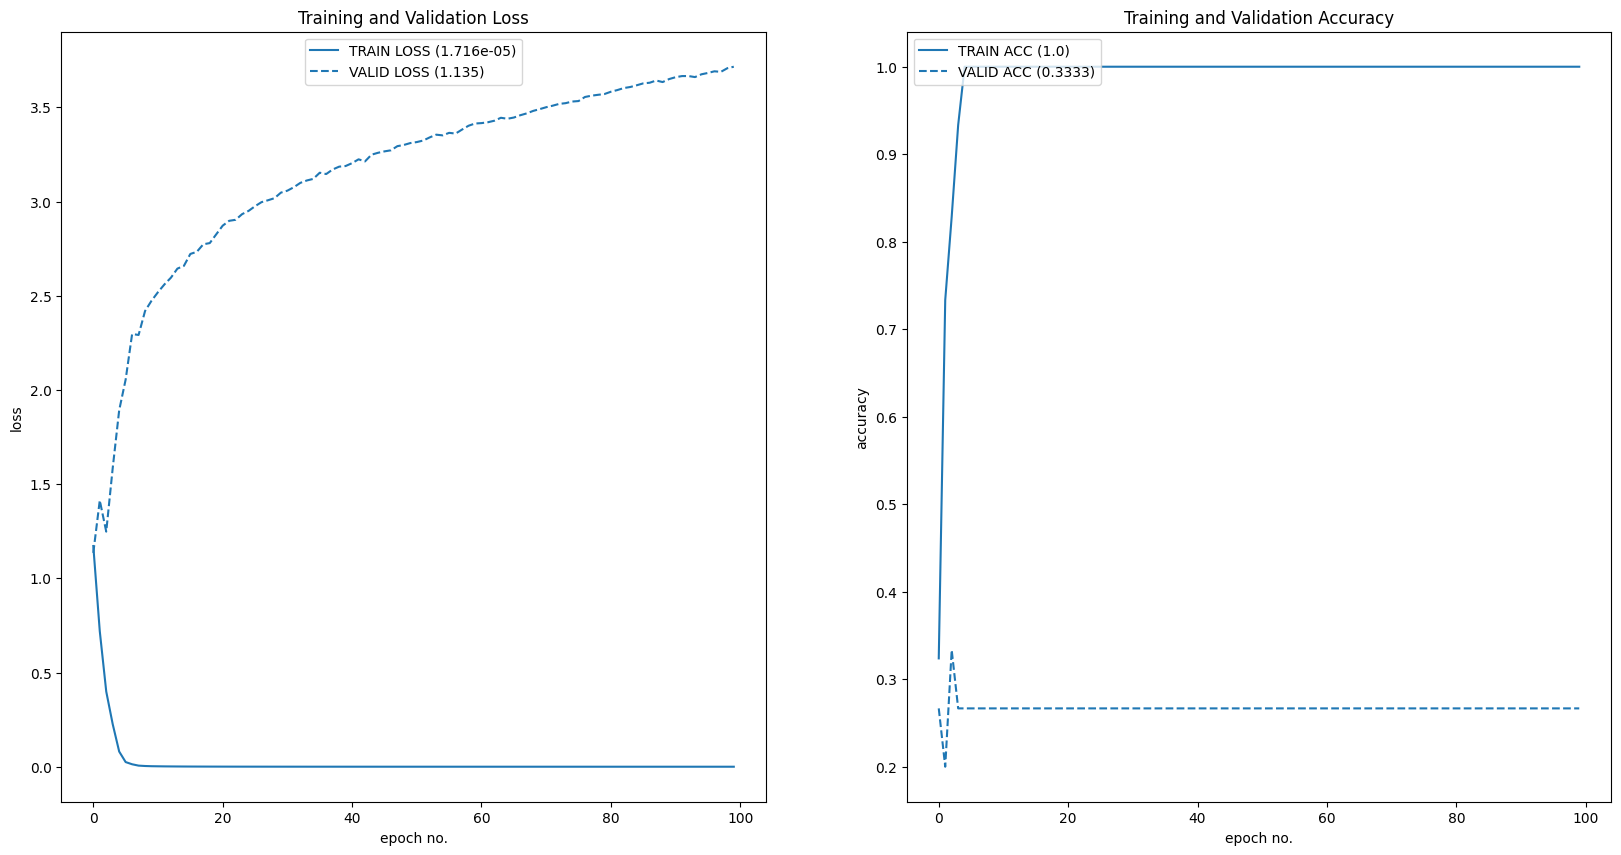

In [75]:
plot_loss_accuracy(
    train_loss=[train_loss],
    val_loss=[val_loss],
    train_acc=[train_acc],
    val_acc=[val_acc],
    colors=["blue"],
    loss_legend_loc="upper center",
    acc_legend_loc="upper left",
)

# <font style="color:blue">Step 5: Sample Prediction</font><a name="predictions"></a>

Show some sample predictions.


## <font style="color:blue">5.1. Make Predictions</font>


In [76]:
def prediction(model, device, batch_input):
    data = batch_input.to(device)

    with torch.no_grad():
        output = model(data)

    # Score to probability using softmax.
    prob = F.softmax(output, dim=1)

    # Get the max probability.
    pred_prob = prob.data.max(dim=1)[0]

    # Get the index of the max probability.
    pred_index = prob.data.max(dim=1)[1]

    return pred_index.cpu().numpy(), pred_prob.cpu().numpy()

## <font style="color:blue">5.2. Get Predictions on a Batch</font>


In [77]:
def get_sample_prediction(model, data_root, img_size, mean, std):
    batch_size = 15

    if torch.cuda.is_available():
        device = "cuda"
        num_workers = 8
    else:
        device = "cpu"
        num_workers = 2

    # It is important to do model.eval() before prediction.
    model.eval()

    # Send model to cpu/cuda according to your system configuration.
    model.to(device)

    # Transformed data
    valid_dataset_trans = datasets.ImageFolder(root=data_root, transform=image_common_transforms(img_size, mean, std))

    # Original image dataset
    valid_dataset = datasets.ImageFolder(root=data_root, transform=image_preprocess_transforms(img_size))

    data_len = valid_dataset.__len__()

    interval = int(data_len / batch_size)

    imgs = []
    inputs = []
    targets = []
    for i in range(batch_size):
        index = i * interval
        trans_input, target = valid_dataset_trans.__getitem__(index)
        img, _ = valid_dataset.__getitem__(index)

        imgs.append(img)
        inputs.append(trans_input)
        targets.append(target)

    inputs = torch.stack(inputs)

    cls, prob = prediction(model, device, batch_input=inputs)

    plt.style.use("default")
    plt.rcParams["figure.figsize"] = (15, 9)
    fig = plt.figure()

    for i, target in enumerate(targets):
        plt.subplot(3, 5, i + 1)
        img = transforms.functional.to_pil_image(imgs[i])
        plt.imshow(img)
        plt.gca().set_title(f"P:{valid_dataset.classes[cls[i]]}({prob[i]:.2}), T:{valid_dataset.classes[targets[i]]}")
    plt.show()

    return

## <font style="color:blue">5.3. Load Model and Run Inference</font>


Next, we will reload the best saved model and use the `get_sample_prediction` function to make some sample predictions. This step is instrumental in visually assessing the performance of our model on the validation dataset, providing a quick and practical insight into how well our model generalizes to new, unseen data.


<ipython-input-68-4bb1e7806922>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


mean: tensor([0.4573, 0.4348, 0.3884]), std: tensor([0.2686, 0.2601, 0.2600])


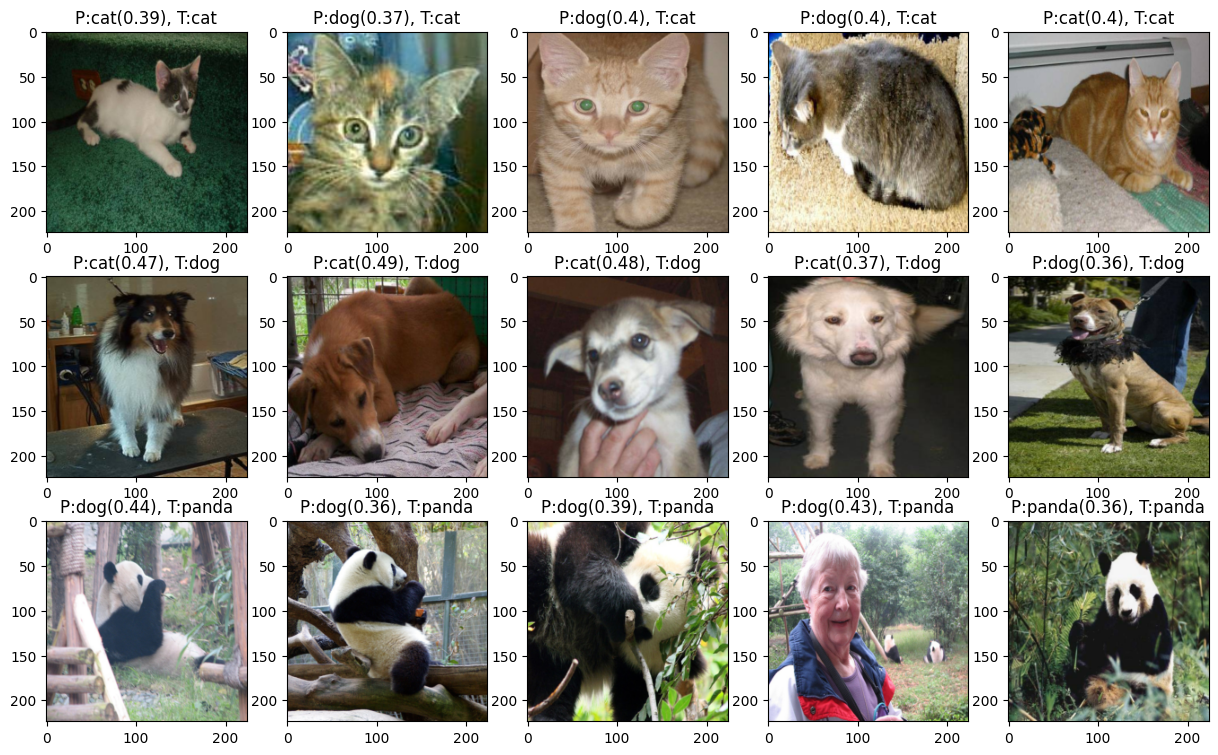

In [78]:
trained_model = MyModel()
trained_model = load_model(
    trained_model, 
    model_dir=training_config.checkpoint_dir, 
    model_file_name=training_config.save_model_name
)

train_data_path = os.path.join(training_config.data_root, "Train")
valid_data_path = os.path.join(training_config.data_root, "Valid")

mean, std = get_mean_std(train_data_path, img_size=training_config.img_size)

get_sample_prediction(trained_model, valid_data_path, img_size=training_config.img_size, mean=mean, std=std)

Despite training the network on a very small subset of data, you can see that the predictions are not that bad. This means that our model is ready for training.


# <font style="color:red">Step 6. Display Mistakes [15 points] </font><a name="display"></a>

The code shown above demonstrates sample predictions. However, since correct predictions don't highlight areas for improvement, it's essential to focus on the errors. Therefore, let's write a similar function specifically designed to display only the mispredictions made by the network, allowing us to identify and address the shortcomings in our model.

**You have to display only 15 images.**


In [79]:
def get_misclassified_predictions(model, data_root, img_size, mean, std, max_samples=15):
    batch_size = 50  # Load more samples to increase chances of finding misclassified ones

    if torch.cuda.is_available():
        device = "cuda"
        num_workers = 8
    else:
        device = "cpu"
        num_workers = 2

    # It is important to do model.eval() before prediction.
    model.eval()

    # Send model to cpu/cuda according to your system configuration.
    model.to(device)

    # Transformed data
    valid_dataset_trans = datasets.ImageFolder(root=data_root, transform=image_common_transforms(img_size, mean, std))

    # Original image dataset
    valid_dataset = datasets.ImageFolder(root=data_root, transform=image_preprocess_transforms(img_size))

    data_len = len(valid_dataset_trans)
    indices = np.linspace(0, data_len - 1, batch_size, dtype=int)

    misclassified_imgs = []
    misclassified_preds = []
    misclassified_targets = []

    for index in indices:
        img_trans, target = valid_dataset_trans[index]
        img_original, _ = valid_dataset[index]  # Original image for visualization

        # Convert single image into a batch of one
        input_tensor = torch.unsqueeze(img_trans, 0).to(device)
        cls, prob = prediction(model, device, batch_input=input_tensor)

        if cls[0] != target:  # If misclassified
            misclassified_imgs.append(img_original)
            misclassified_preds.append(cls[0])
            misclassified_targets.append(target)

        if len(misclassified_imgs) >= max_samples:
            break  # Stop once we have enough misclassified samples

    # Display misclassified images
    if len(misclassified_imgs) == 0:
        print("No misclassifications found in this sample batch.")
        return

    plt.style.use("default")
    plt.rcParams["figure.figsize"] = (15, 9)
    fig = plt.figure()

    for i in range(len(misclassified_imgs)):
        plt.subplot(3, 5, i + 1)
        img = transforms.functional.to_pil_image(misclassified_imgs[i])
        plt.imshow(img)
        plt.title(
            f"Predictions:{valid_dataset_trans.classes[misclassified_preds[i]]}, Target:{valid_dataset_trans.classes[misclassified_targets[i]]}",
            color="red")
        plt.axis("off")

    plt.show()

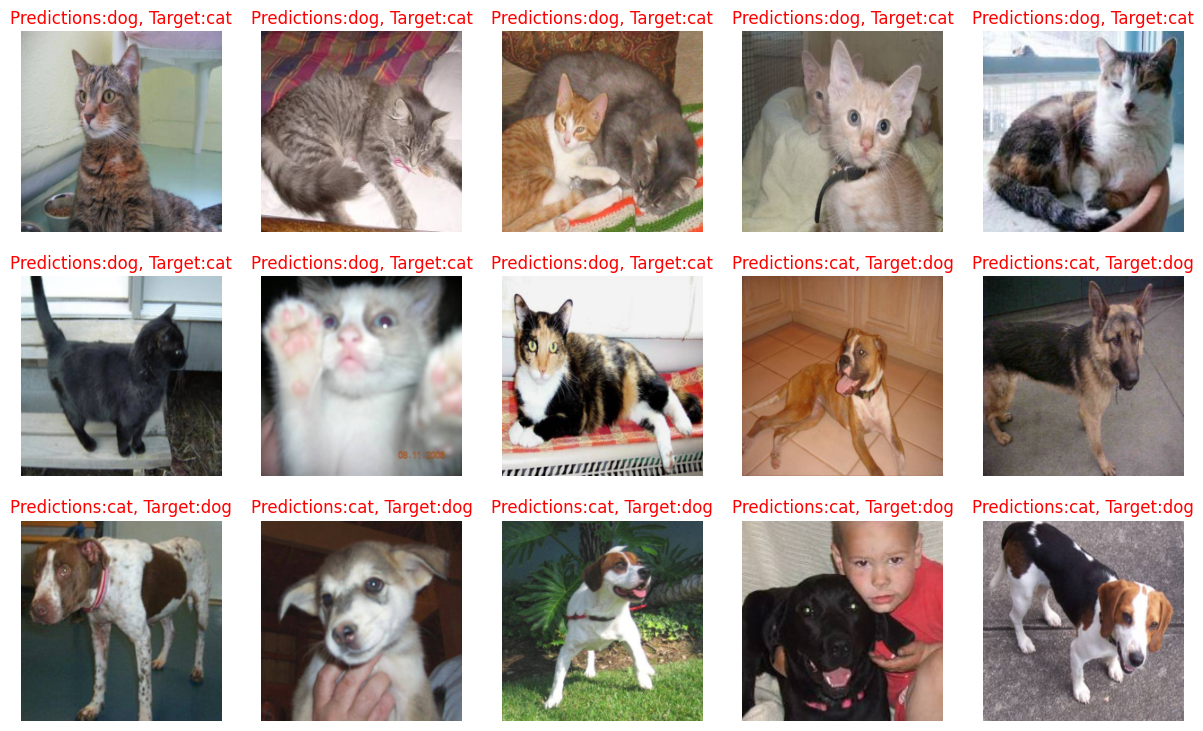

In [80]:
get_misclassified_predictions(trained_model, valid_data_path, img_size=training_config.img_size, mean=mean, std=std)


**Upon completing the project, <font style="color:red">upload the notebook to the lab for grading and feedback.</font>**


**<font style="color:red">Please do not make your notebooks public or publish them on the competition page. You only need to submit your notebook to the lab. This is to make sure that students don't copy each other.</font>**
